## Homework 2 

### Question 1c

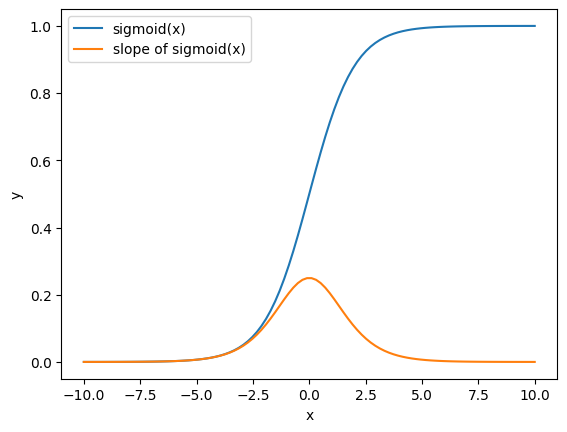

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Callable

def sigmoid(t):
    return 1/(1 + np.exp(-t))

x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, sigmoid(x)*(1-sigmoid(x)))
plt.legend(['sigmoid(x)', 'slope of sigmoid(x)'])
plt.show()


## Question 4


In [121]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
from matplotlib import colors
# from autograd import grad 
# from autograd import hessian
from utils import load_data_npz, create_dataframe

DATA_DIR = './data/hw2_data/'

In [122]:
# compute linear combination of input point
def model_1(x,w):
    # compute linear combination and return
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# a least squares function for linear regression
def least_squares(w,x,y):    
    cost = np.sum((model_1(x,w)-y)**2)
    return cost/float(y.size)

def l2_loss_grad(w,x,y):
    # compute gradient of least squares loss
    grad = np.zeros(w.shape)
    grad[0] = np.sum(model_1(x,w)-y)/float(y.size)
    grad[1:] = np.dot(x, (model_1(x,w)-y).T)/float(y.size)
    return grad

def gradient_descent(g: Callable,
                alpha: int,
                max_its: int,
                w: np.array(float), 
                data,
                labels
                ) -> Tuple[List[np.array], List[np.array], np.array]:
    
    bestiter = 0
    weight_history = [w] 
    cost_history = [g(w,data,labels)]
    
    for iter in range(max_its):
        # evaluate the gradient, compute its length
        grad_eval = l2_loss_grad(w, data, labels)
        grad_norm = np.linalg.norm(grad_eval)
        
        # check that magnitude of gradient is not too small, if yes pick a random direction to move
        if grad_norm == 0:
            # pick random direction and normalize to have unit legnth
            grad_eval = 10**-6*np.sign(2*np.random.rand(len(w)) - 1)
            grad_norm = np.linalg.norm(grad_eval)
            grad_eval /= grad_norm
    
        # take gradient descent step
        w = w - alpha * grad_eval
        weight_history.append(w) 
        
        # return only the weight providing the lowest evaluation
        test_eval = g(w, data, labels)
        cost_history.append(test_eval)
        cur_best = cost_history[bestiter]
        if test_eval < cur_best:
            bestiter = max(bestiter, iter)

    return cost_history, weight_history, bestiter

In [123]:
vis = 0
inpf = DATA_DIR + 'classification_synthetic_1.npz'
npzf= np.load(inpf)

x_train, x_test, y_train, y_test = load_data_npz(npzf, labels_train = "labels_train", labels_test = "labels_test")
df_train, df_test = create_dataframe(x_train, x_test, y_train, y_test, plot_flag = vis)
print(df_train.info())
# (optional) 3D projection
if vis:
    fig = plt.figure(figsize=(14,6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    view = [20, 200]
    ax.scatter(x_train[:,0],x_train[:,1], y_train, c = 'k', edgecolor = 'r', linewidth = 1, alpha = 0.25)
    ax.view_init(view[0],view[1])
    ax.set_xlabel(r'$x_1$',fontsize = 18,labelpad = 5)
    ax.set_ylabel(r'$x_2$',fontsize = 18,labelpad = 5)
    ax.set_zlabel(r'$Y$',fontsize = 18,rotation = 90)
    plt.show()


Size of x_train dataset:  (1000, 2)
Size of y_train dataset:  (1000,)
Size of x_test dataset:  (100, 2)
Size of y_test dataset:  (100,)
does x_train contain nan?  False
does x_test contain nan?  False
does y_train contain nan?  False
does y_test contain nan?  False
Total Null values count in train:  0
Total Null values count in test:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   Label   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB
None


In [124]:
print(df_train['X1'].shape, df_train['X2'].shape, df_train['Label'].shape)
df_train['Label'] = df_train['Label'].replace(2, -1)
df_test['Label'] = df_test['Label'].replace(2, -1)
trainX = df_train.to_numpy()[:, 0:2].T
trainY = df_train.to_numpy()[None, :, 2]
trainX.shape, trainY.shape

df_train['Label']

(1000,) (1000,) (1000,)


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995   -1.0
996   -1.0
997   -1.0
998   -1.0
999   -1.0
Name: Label, Length: 1000, dtype: float64

Min Cost: 0.10143334966370356 || Best w: [[0.01127996]
 [0.03035156]
 [0.15330054]]
Min Cost: 0.11828237963436364 || Best w: [[0.11499195]
 [0.02965457]
 [0.15356497]]
Min Cost: 0.1382769457871167 || Best w: [[0.17512789]
 [0.03339893]
 [0.14852311]]
Min Cost: 0.23056581695710918 || Best w: [[0.24255085]
 [0.08885539]
 [0.09723698]]
using best weights:  [[0.01127996]
 [0.03035156]
 [0.15330054]]


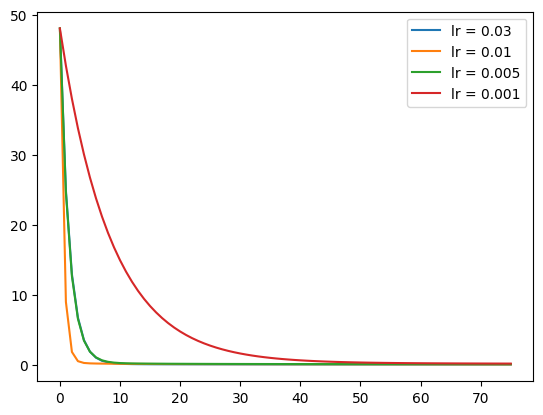

In [125]:
g = least_squares
w = np.random.rand(3,1)
max_its = 100

best_cost = 1e8
legends = []
for alpha_choice in [0.03, 0.01, 0.005, 0.001]:
    cost_history, weight_history, opt_iter = gradient_descent(g, alpha_choice, max_its, w, 
                                                data = trainX, labels = trainY)
    # learning curve
    legends.append(f'lr = {alpha_choice}')
    if cost_history[opt_iter] <= best_cost:
        best_cost = cost_history[opt_iter]
        w_opt = weight_history[opt_iter]
    plt.plot(cost_history)
    print(f'Min Cost: {cost_history[opt_iter]} || Best w: {weight_history[opt_iter]}')
plt.legend(legends)
print('using best weights: ', w_opt)

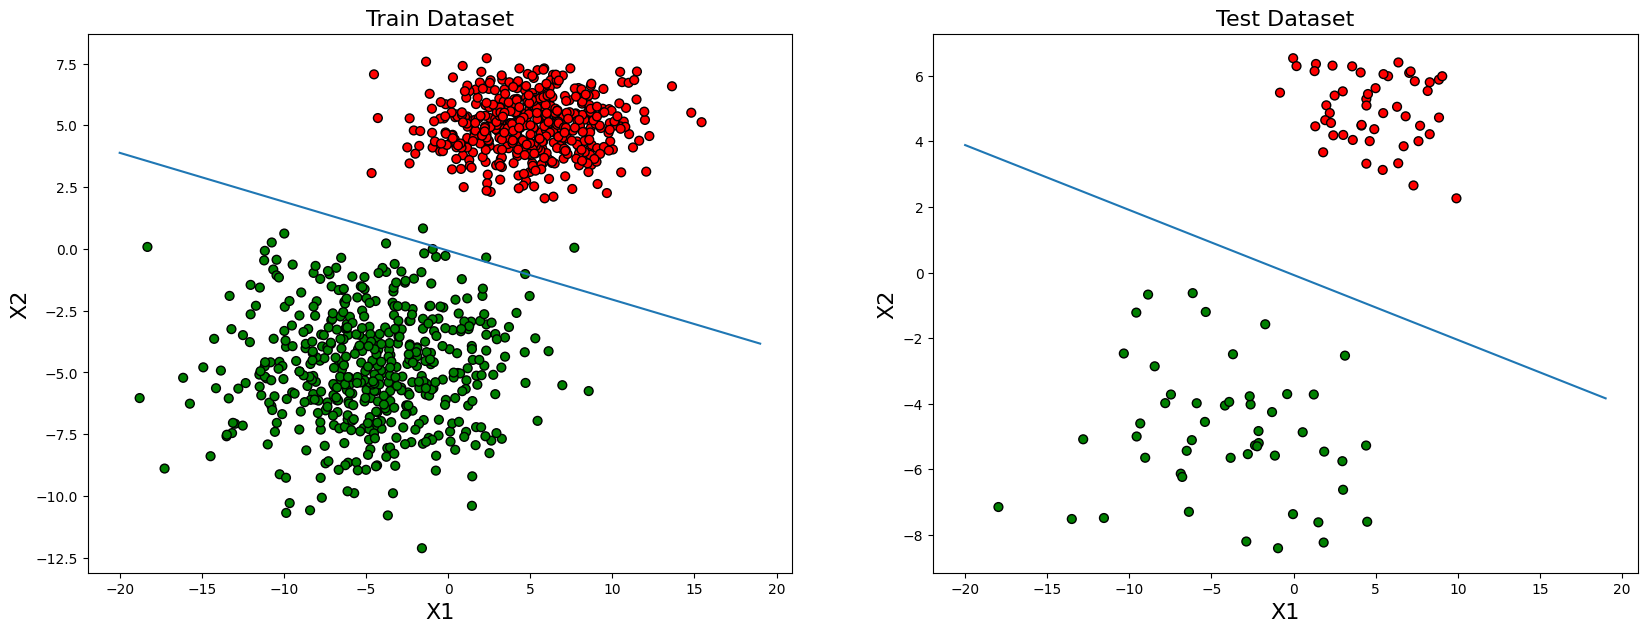

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
col_2C_train = np.where(df_train['Label']==1,'r',np.where(df_train['Label']==-1,'g', 'k'))
ax1.scatter(df_train['X1'],df_train['X2'],c= col_2C_train, s=40, edgecolors='k')
ax1.set_title('Train Dataset',fontsize=16)
ax1.set_xlabel('X1', fontsize = 16)
ax1.set_ylabel('X2', fontsize = 16)

col_2C_test = np.where(df_test['Label']==1,'r',np.where(df_test['Label']==-1,'g', 'k'))
ax2.scatter(df_test['X1'],df_test['X2'],c= col_2C_test, s=40, edgecolors='k')
ax2.set_title('Test Dataset',fontsize=16)
ax2.set_xlabel('X1', fontsize = 16)
ax2.set_ylabel('X2', fontsize = 16)
# plot decision boundary
LIMIT = 20
x_line = np.arange(-LIMIT,LIMIT,1)
z = - w_opt[0]/w_opt[2] - w_opt[1]/w_opt[2]*x_line
ax1.plot(x_line, z)
ax2.plot(x_line, z)

plt.show()